In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("bank_clean.csv")
df

,age,job,marital,housing,loan,contact,month,day_of_week,duration,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education,default
0,56,housemaid,married,no,no,telephone,may,mon,261,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic.4y,no
1,57,services,married,no,no,telephone,may,mon,149,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high.school,no
2,37,services,married,yes,no,telephone,may,mon,226,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high.school,no
3,40,admin.,married,no,no,telephone,may,mon,151,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic.6y,no
4,56,services,married,no,yes,telephone,may,mon,307,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high.school,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39361,33,admin.,married,no,yes,cellular,sep,wed,397,1,...,2,failure,-1.1,94.199,-37.5,0.879,4963.6,yes,professional.course,no
39362,33,technician,married,no,no,cellular,sep,wed,569,1,...,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,yes,professional.course,no
39363,32,technician,married,yes,no,cellular,sep,wed,155,1,...,1,success,-1.1,94.199,-37.5,0.879,4963.6,yes,university.degree,no
39364,32,technician,married,no,no,cellular,sep,wed,183,1,...,5,success,-1.1,94.199,-37.5,0.879,4963.6,yes,professional.course,no


Among different ages, how many subscribe the term?

In [5]:
df['age'].describe()

count    39366.000000
mean        39.984936
std         10.362440
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [12]:
def age_cate(df):
    if df['age'] <= 32:
        val = 'young'
    elif df['age'] > 47:
        val = 'old'
    else:
        val = 'medium'
    return val

In [13]:
df['age_cate'] = df.apply(age_cate, axis=1)

In [14]:
df

,age,job,marital,housing,loan,contact,month,day_of_week,duration,campaign,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education,default,age_cate
0,56,housemaid,married,no,no,telephone,may,mon,261,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic.4y,no,old
1,57,services,married,no,no,telephone,may,mon,149,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high.school,no,old
2,37,services,married,yes,no,telephone,may,mon,226,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high.school,no,medium
3,40,admin.,married,no,no,telephone,may,mon,151,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic.6y,no,medium
4,56,services,married,no,yes,telephone,may,mon,307,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high.school,no,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39361,33,admin.,married,no,yes,cellular,sep,wed,397,1,...,failure,-1.1,94.199,-37.5,0.879,4963.6,yes,professional.course,no,medium
39362,33,technician,married,no,no,cellular,sep,wed,569,1,...,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,yes,professional.course,no,medium
39363,32,technician,married,yes,no,cellular,sep,wed,155,1,...,success,-1.1,94.199,-37.5,0.879,4963.6,yes,university.degree,no,young
39364,32,technician,married,no,no,cellular,sep,wed,183,1,...,success,-1.1,94.199,-37.5,0.879,4963.6,yes,professional.course,no,young


<AxesSubplot:title={'center':'number of people subscribe the term with different ages '}, xlabel='age_cate'>

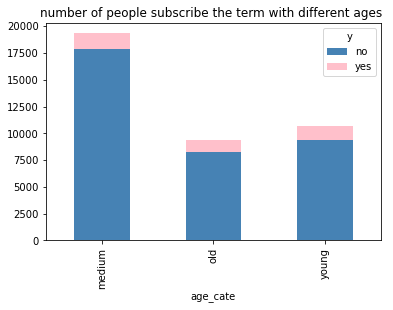

In [16]:
df.groupby(['age_cate', 'y']).size().unstack().plot(kind='bar', stacked=True,
            color=['steelblue','pink'], title='number of people subscribe the term with different ages ')

*** VA's comment: You have the bins for the above chart split by quartile (1st and 4th), so by definition the "medium" category is going to be twice as large as the other two bins. I think the more interesting information is what % of each quartile is actually subscribing? You can leave this as a histogram, but I would suggest split into 4 bins (by each quartile) and have a label at the top that says the % of yes "subscribers" for each bin.

Among different jobs, how many subscribe the terms?

<AxesSubplot:title={'center':'number of people subscribe the term with different jobs'}, xlabel='job'>

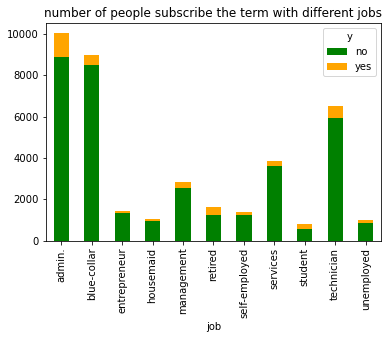

In [18]:
df.groupby(['job', 'y']).size().unstack().plot(kind='bar', stacked=True,
            color=['green','orange'], title='number of people subscribe the term with different jobs')

Among people with different marital status, how many subscribe the term?

<AxesSubplot:title={'center':'number of people subscribe the term with different marital statuses"'}, xlabel='marital'>

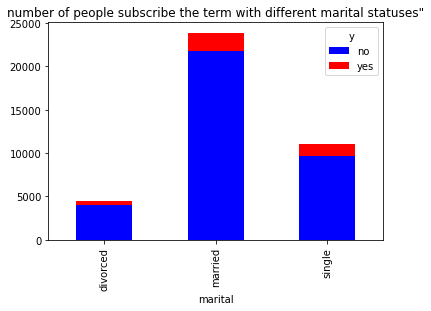

In [19]:
df.groupby(['marital', 'y']).size().unstack().plot(kind='bar', stacked=True,
            color=['blue','red'], title='number of people subscribe the term with different marital statuses"')

Among different levels of education, how many subscribe the term?

In [28]:
df = df[df['education'].isin(['illiterate', 'basic.4y', 'basic.6y','basic.9y','high.school','professional.course','university.degree'])]

<AxesSubplot:title={'center':'number of people subscribe the term with different marital statuses"'}, xlabel='education'>

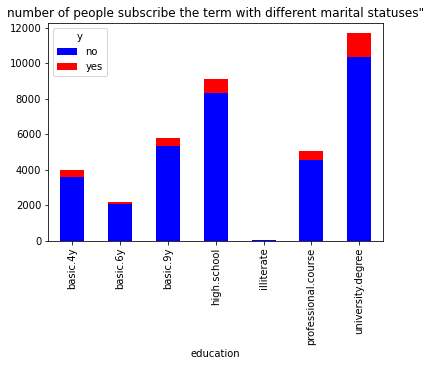

In [30]:
df.groupby(['education', 'y']).size().unstack().plot(kind='bar', stacked=True,
            color=['blue','red'], title='number of people subscribe the term with different marital statuses"')

*** VA's comment: similiar to my comment under the first chart, i think it would be helpful to put a laebl for the % of "yes" for each of these categorical breakdowns.